#### Part-1 :  Reading the data

In [1239]:
#importing all necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os
path= '/Users/mayank/Documents/AI&ML-PGD/Main-Course/Linear-Regression-Assignment'
os.chdir(path)

import warnings
warnings.filterwarnings('ignore')

In [1240]:
#read the data
car_df = pd.read_csv("Dataset/CarPrice_Assignment.csv",encoding="ISO-8859-1")
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1241]:
#check number of rows and columns
car_df.shape

(205, 26)

In [1242]:
#lets check no of values in each column to see if we have any null value in any column
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1243]:
#lets see some statistical values
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1244]:
# missing value percentage for each column
round(car_df.isnull().sum()/len(car_df.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

#### Part-2 :  Cleaning and understanding the data

In [1245]:
#lets drop id column as it is not useful
car_df.drop('car_ID',axis=1,inplace=True)

In [1246]:
#check any duplicate exist, lets drop it
car_df=car_df.drop_duplicates()

In [1247]:
#lets see the number of rows and columns in the dataset
car_df.shape

(205, 25)

In [1248]:
#Splitting company name from CarName column
company_name = car_df['CarName'].apply(lambda x : x.split(' ')[0])
car_df.insert(3,"company_name",company_name)
car_df.drop(['CarName'],axis=1,inplace=True)
car_df.head()

,symboling,fueltype,company_name,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1249]:
#fetching unique company names
car_df['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### There are couple of spelling mistakes in the car comapny name like porsche as porcshce, volkswagen as vokswagen etc. lets fix them

In [1250]:
#rename the car names as their as some speeling mistakes
car_df['company_name'] = car_df['company_name'].replace({'maxda': 'mazda', 
                                                         'nissan': 'Nissan', 
                                                         'porcshce': 'porsche', 
                                                         'toyouta': 'toyota', 
                                                         'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [1251]:
#fetching unique company names
car_df['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [1252]:
# lets see the datatype of each varaible
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   company_name      205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

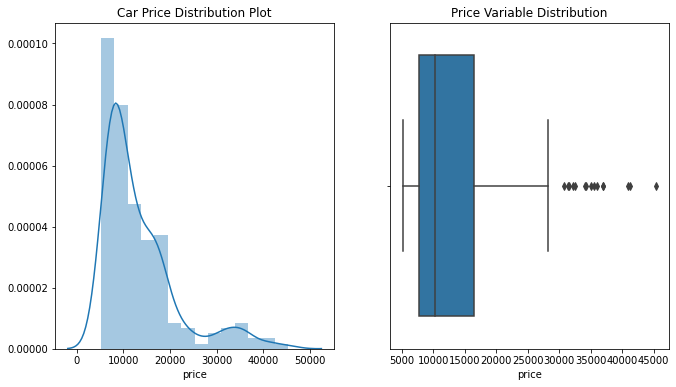

In [1253]:
# Lets look at the price column distribution
plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_df['price'])

plt.subplot(1,2,2)
plt.title('Price Variable Distribution')
sns.boxplot(car_df['price'])

plt.show()

In [1254]:
#fetching quartile values for price
car_df.price.describe(percentiles = [0.25,0.50,0.75,0.9])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
90%      22563.000000
max      45400.000000
Name: price, dtype: float64

##### Most of the price distribution lies in the 3rd quratile (75%)

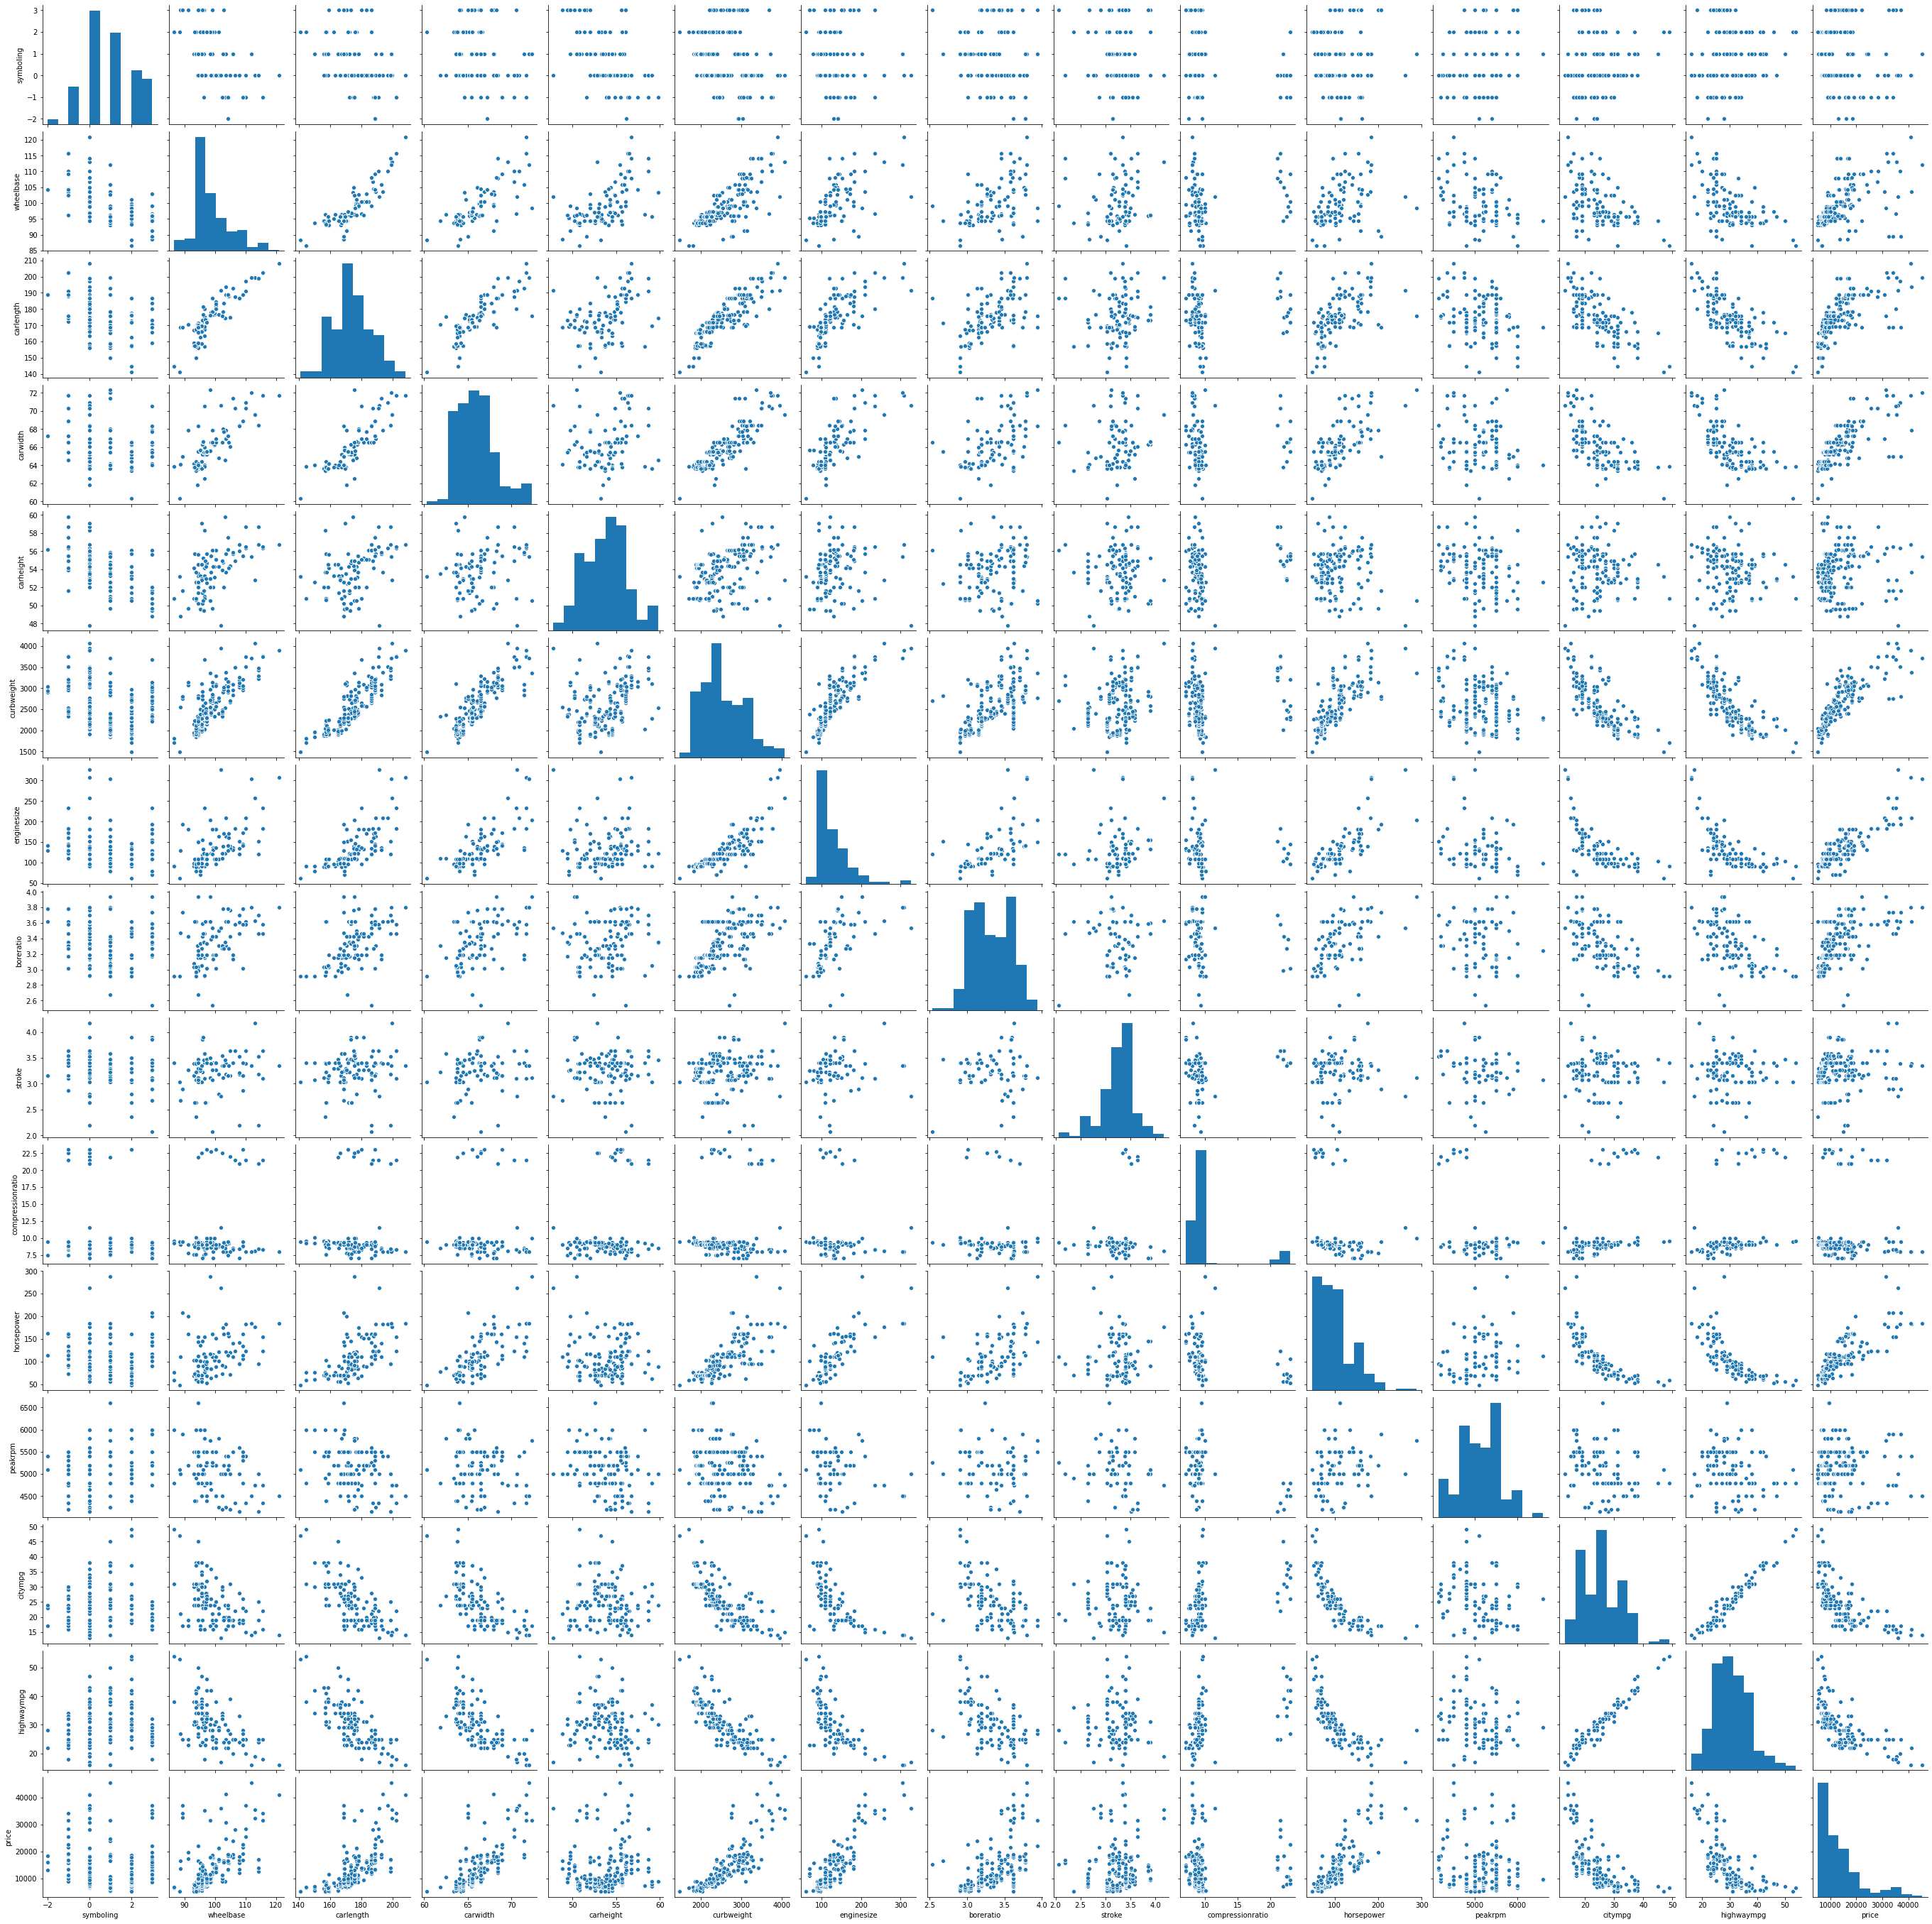

In [1237]:
#visulazing the numeric variables
sns.pairplot(car_df)
plt.show()

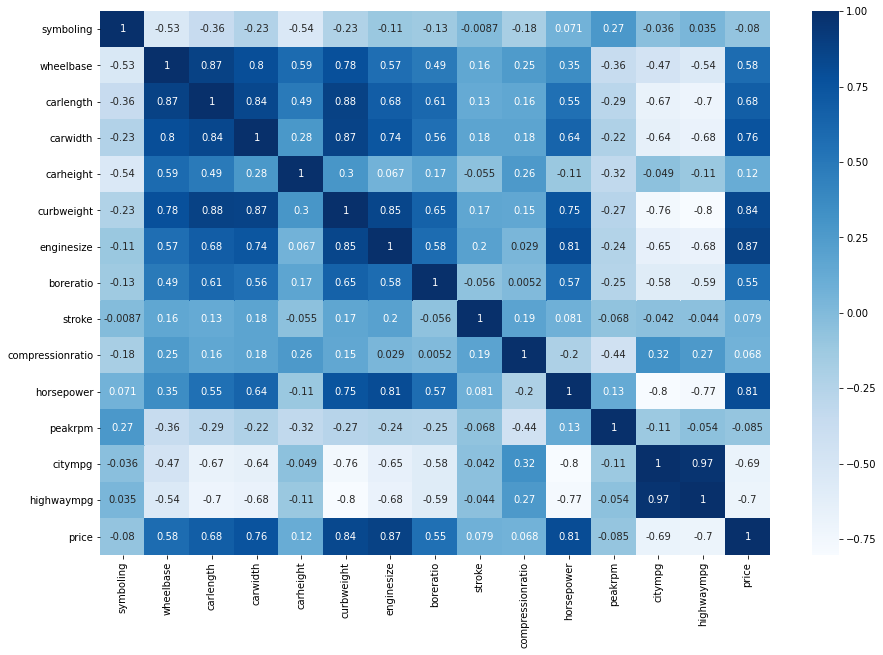

In [1238]:
#heatmap to analyse correlation among variables
plt.figure(figsize = (15, 10))
sns.heatmap(car_df.corr(), annot = True, cmap="Blues")
plt.show()

#### Part-3 :  Visualizations

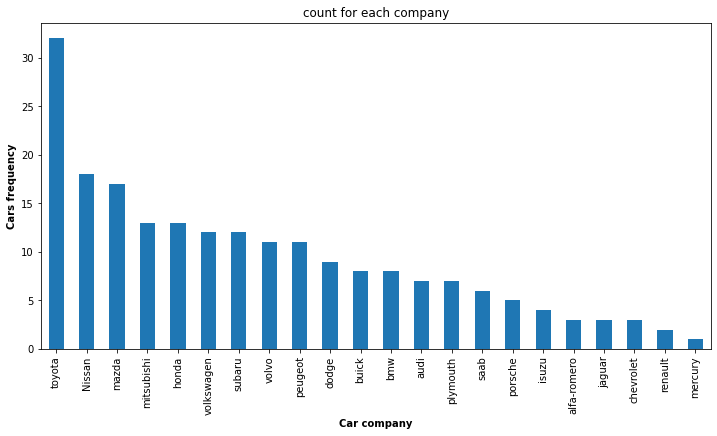

In [905]:
#lets see no of cars for each company
plt.figure(figsize=(12,6))
ax = car_df['company_name'].value_counts().plot(kind='bar',stacked=False)
ax.title.set_text('count for each company')
plt.xlabel("Car company",fontweight = 'bold')
plt.ylabel("Cars frequency",fontweight = 'bold')
plt.show()

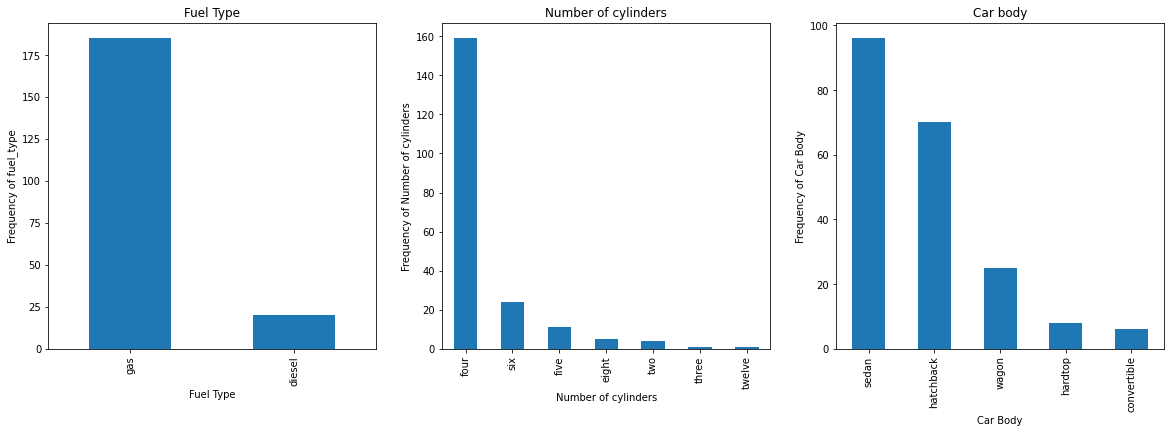

In [1255]:
# Visualizing some more variables
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = car_df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel_type')

plt.subplot(1,3,2)
plt1 = car_df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')


plt.subplot(1,3,3)
plt1 = car_df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')
plt.show()

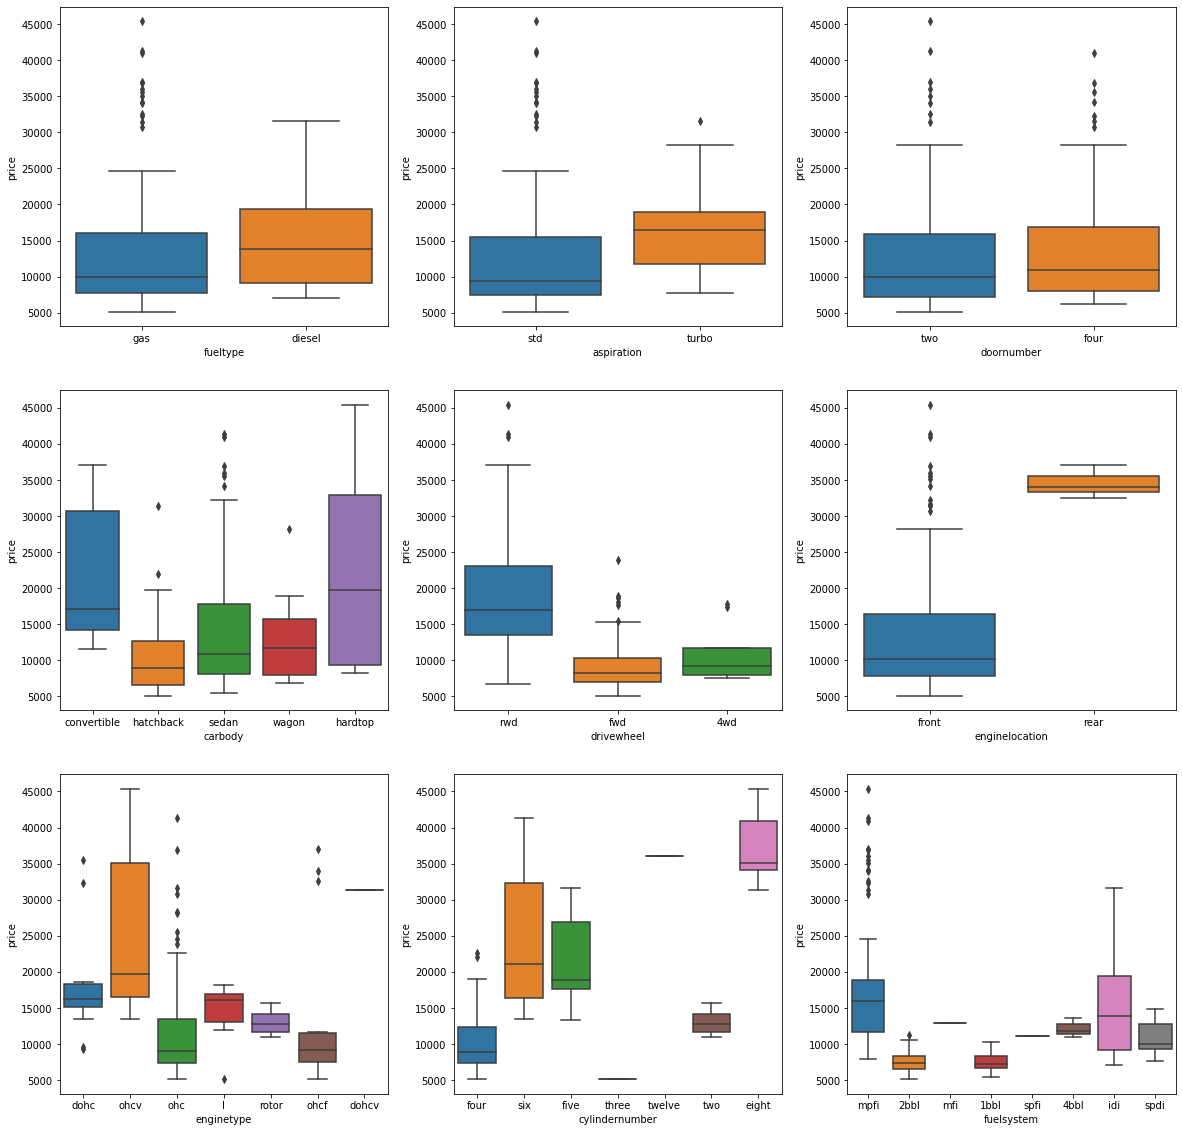

In [1256]:
#lets analyse categorical variables against
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)

plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)

plt.show()

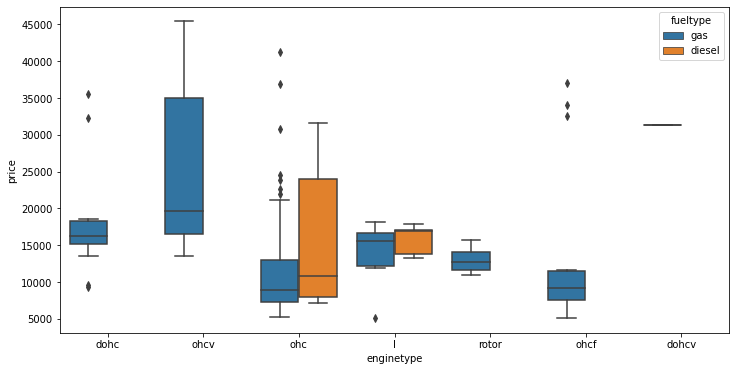

In [1257]:
#now lets see how multiple variables together affect the price
plt.figure(figsize=(12,6))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=car_df)
plt.show()

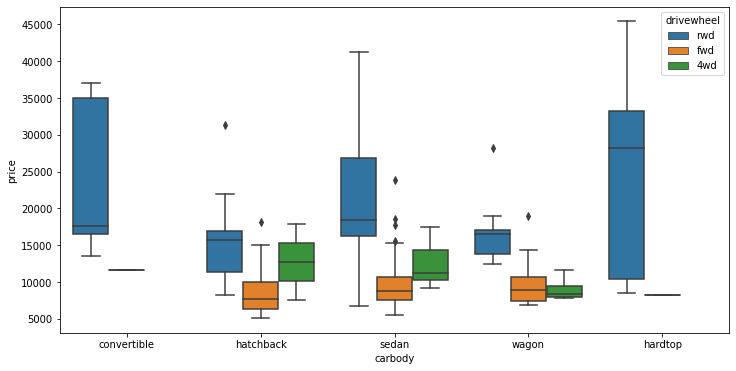

In [1258]:
#lets analyze the pricing of cars for diffrent car body according to drivewheel
plt.figure(figsize=(12,6))
sns.boxplot(x='carbody', y='price', hue = 'drivewheel', data = car_df)
plt.show()

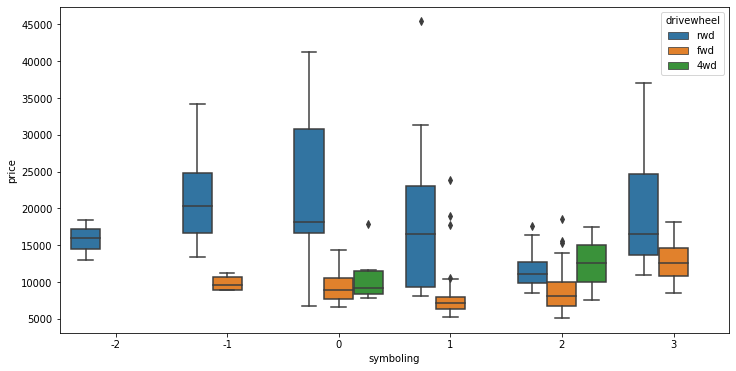

In [1259]:
#lets analyze the pricing of cars for symboling of car according to drivewheel
plt.figure(figsize=(12,6))
sns.boxplot(x = 'symboling', y = 'price', hue = 'drivewheel', data = car_df)
plt.show()

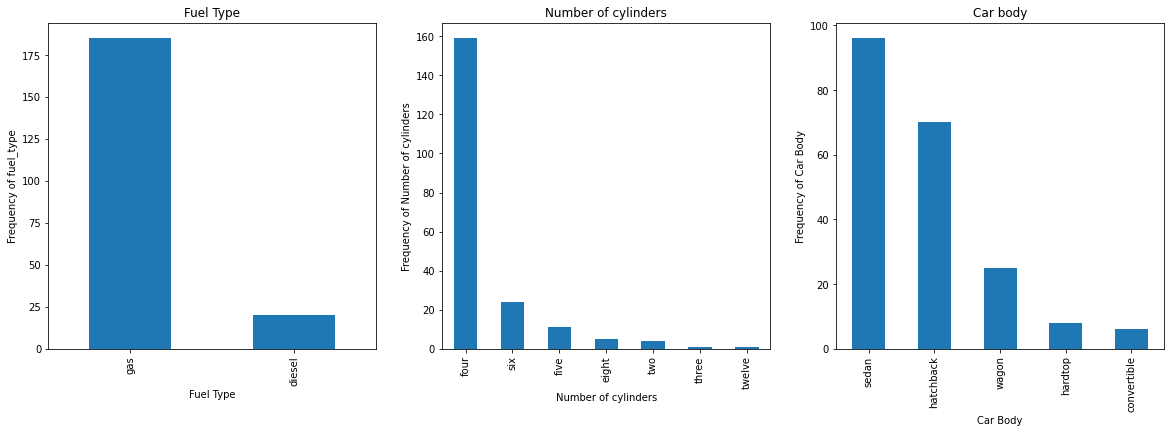

In [1260]:
# Visualizing some more variables
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt1 = car_df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel_type')

plt.subplot(1,3,2)
plt1 = car_df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')


plt.subplot(1,3,3)
plt1 = car_df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')
plt.show()

<Figure size 1080x1440 with 0 Axes>

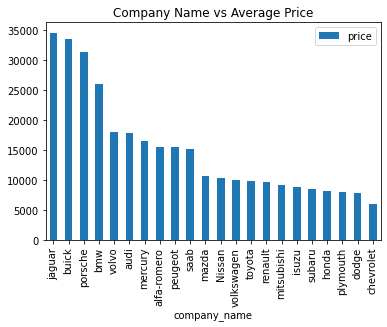

In [1261]:
# Visualizing some more variables
plt.figure(figsize=(15, 20))
df = pd.DataFrame(car_df.groupby(['company_name'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

<Figure size 1080x1440 with 0 Axes>

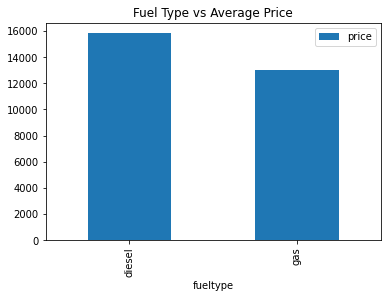

In [1262]:
#visualizing the average price for both fuel types-petrol and disel
plt.figure(figsize=(15, 20))
df = pd.DataFrame(car_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

<Figure size 1080x1440 with 0 Axes>

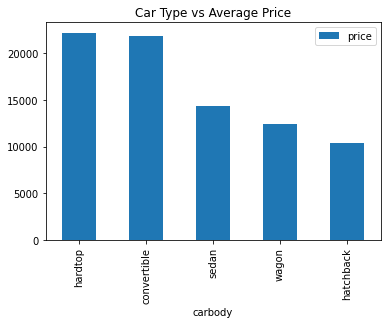

In [1263]:
#visualizing the average price for diffrent car types
plt.figure(figsize=(15, 20))
df = pd.DataFrame(car_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Part 4: Data Understanding and Correction

In [1264]:
#lets drop symboling column as it is not useful for building model
car_df.drop('symboling',axis=1,inplace=True)
car_df.drop('company_name',axis=1,inplace=True)

In [1265]:
#fetching all the columns of the dataframe
car_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [1266]:
#after all analyses we reached to the conclsuion that these varaibles are signicifant for procce prediction
sig_vars = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'compressionratio','price']

In [1267]:
car_df = car_df[sig_vars]
car_df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,compressionratio,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.0,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.0,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,9.0,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,10.0,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,8.0,17450.0


In [1268]:
#getting count of unique values in 'fueltype'
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [1269]:
#getting count of unique values in 'aspiration'
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [1270]:
# Converting categorical variables with two levels to either 0 or 1
car_df['fueltype'] = car_df['fueltype'].map({'gas': 1, 'diesel': 0})
car_df['aspiration'] = car_df['aspiration'].map({'std': 1, 'turbo': 0})
car_df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,compressionratio,price
0,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.0,13495.0
1,1,1,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,9.0,16500.0
2,1,1,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,9.0,16500.0
3,1,1,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,10.0,13950.0
4,1,1,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,8.0,17450.0


In [1271]:
#fucntion to get dummy varaibles
def get_dummies(var):
    temp = pd.get_dummies(car_df[var], drop_first = True)
    df = pd.concat([car_df, temp], axis = 1)
    df.drop([var], axis = 1, inplace = True)
    return df

In [1272]:
#lets get dummy variables for these columns
car_df = get_dummies('carbody')
car_df = get_dummies('drivewheel')
car_df = get_dummies('enginetype')
car_df = get_dummies('cylindernumber')

In [1273]:
car_df.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,compressionratio,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,1,88.6,168.8,64.1,2548,130,3.47,111,9.0,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,88.6,168.8,64.1,2548,130,3.47,111,9.0,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,94.5,171.2,65.5,2823,152,2.68,154,9.0,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,99.8,176.6,66.2,2337,109,3.19,102,10.0,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,1,99.4,176.6,66.4,2824,136,3.19,115,8.0,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [1274]:
#splitting the datasets
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1275]:
print(df_train.shape)
print(df_test.shape)

(143, 29)
(62, 29)


### Rescaling the Features 

There are 2 types of Scalling:
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [1276]:
#Instantiate the min max scaler object
scaler = MinMaxScaler()

# create list of numeric vars
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio','compressionratio', 'horsepower'
       ,'price']

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,compressionratio,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,1,1,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.15000,0.068818,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1,1,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.15625,0.466890,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,1,1,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.15000,0.122110,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.12500,0.314446,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,1,0,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.03125,0.382131,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [1277]:
#get statitical values from datasets
df_train.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,compressionratio,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.190787,0.219310,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.288490,0.387050,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.237181,0.215682,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.100000,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.125000,0.140343,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.150000,0.313479,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


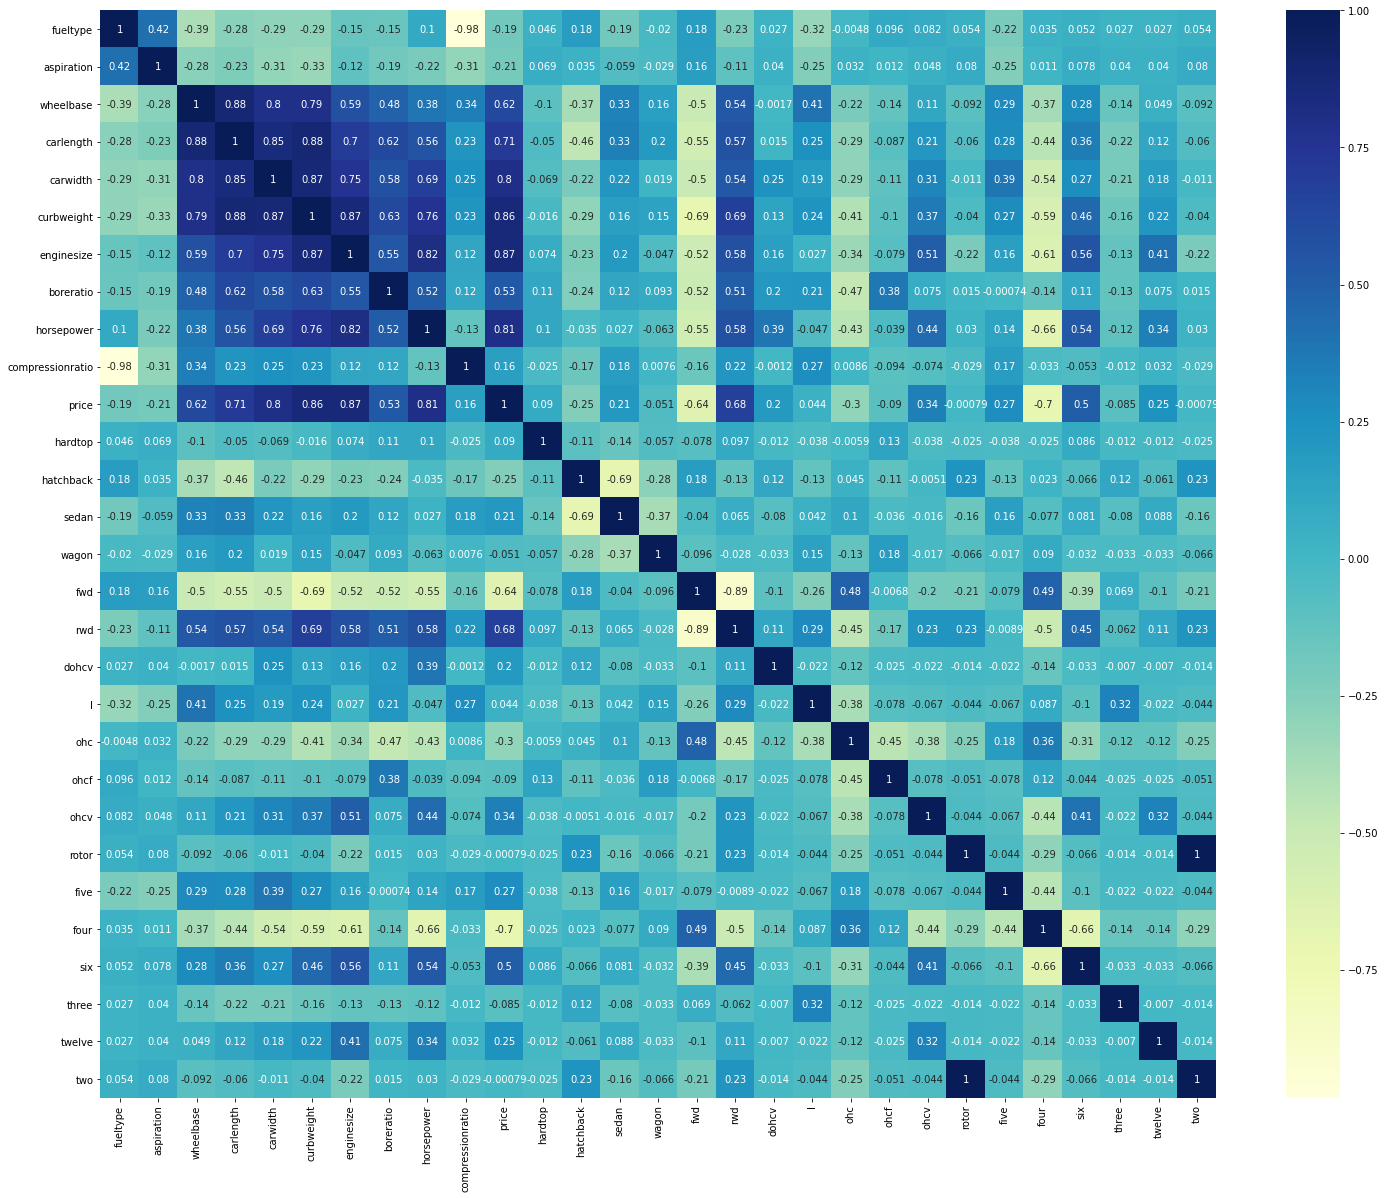

In [1278]:
#heatmap to measure correlation between variables
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(),annot = True, cmap='YlGnBu')
plt.show()

#### Part-5 :  Training the Model

##### Dividing into X and Y sets for the model building

In [1279]:
#X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [1280]:
X_train_sm = sm.add_constant(X_train['curbweight'])

#creating the first model
lr = sm.OLS(y_train, X_train_sm)

#fir the model
lr_model = lr.fit()

In [1281]:
# Check the parameters obtained
lr_model.params

const        -0.139568
curbweight    0.879863
dtype: float64

In [1282]:
#check model's summary for other statistical values
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.06e-43
Time:                        23:44:35   Log-Likelihood:                 114.04
No. Observations:                 143   AIC:                            -224.1
Df Residuals:                     141   BIC:                            -218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.020     -6.974      0.000      -0.179      -0.100
curbweight     0.8799      0.044     20.180      0.000       0.794       0.966
==============================================================================
Omnibus:                       51.679   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.291
Skew:                           1.232   Prob(JB):                     1.46e-48
Kurtosis:                       8.559   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

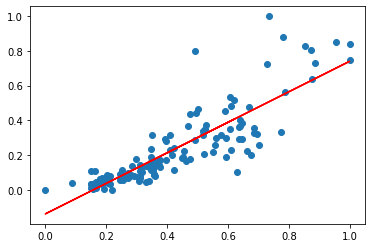

In [1283]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], -0.1396 + 0.8799*X_train_sm.iloc[:, 1], 'r')
plt.show()

### Adding another variable

The R-squared value obtained is `0.743`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `enginesize`.

In [1284]:
# add another variable enginesize
X_train_sm = X_train[['curbweight','enginesize']]
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [1285]:
# Check the parameters obtained
lr_model.params

const        -0.128113
curbweight    0.450496
enginesize    0.678162
dtype: float64

In [1286]:
#check model's summary for other statistical values
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.31e-50
Time:                        23:44:37   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.000      -0.163      -0.093
curbweight     0.4505      0.076      5.890      0.000       0.299       0.602
enginesize     0.6782      0.105      6.489      0.000       0.472       0.885
==============================================================================
Omnibus:                       36.002   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.998
Skew:                           1.023   Prob(JB):                     2.12e-19
Kurtosis:                       6.202   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding another variable

The R-squared value obtained is `0.802`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the another highly correlated variable, i.e. `horsepower`.

In [1287]:
# add another variable enginesize
X_train_sm = X_train[['curbweight','enginesize','horsepower']]
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [1288]:
# Check the parameters obtained
lr_model.params

const        -0.126942
curbweight    0.402044
enginesize    0.474331
horsepower    0.298222
dtype: float64

In [1289]:
#check model's summary for other statistical values
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.16e-51
Time:                        23:44:38   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.000      -0.161      -0.093
curbweight     0.4020      0.075      5.384      0.000       0.254       0.550
enginesize     0.4743      0.115      4.114      0.000       0.246       0.702
horsepower     0.2982      0.083      3.589      0.000       0.134       0.463
==============================================================================
Omnibus:                       25.597   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.389
Skew:                           0.751   Prob(JB):                     9.38e-13
Kurtosis:                       5.653   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding another variable

The R-squared value obtained is `0.819`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the another highly correlated variable, i.e. `carwidth`.

In [1290]:
# add another variable enginesize
X_train_sm = X_train[['curbweight','enginesize','horsepower','carwidth']]
X_train_sm = sm.add_constant(X_train_sm)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [1291]:
# Check the parameters obtained
lr_model.params

const        -0.158230
curbweight    0.245334
enginesize    0.486169
horsepower    0.282452
carwidth      0.207804
dtype: float64

In [1292]:
#check model's summary for other statistical values
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.91e-51
Time:                        23:44:58   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.000      -0.200      -0.117
curbweight     0.2453      0.098      2.511      0.013       0.052       0.439
enginesize     0.4862      0.113      4.286      0.000       0.262       0.710
horsepower     0.2825      0.082      3.448      0.001       0.120       0.444
carwidth       0.2078      0.086      2.429      0.016       0.039       0.377
==============================================================================
Omnibus:                       36.489   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.927
Skew:                           1.009   Prob(JB):                     6.62e-21
Kurtosis:                       6.394   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding all the variables to the model

In [1293]:
# Check all the columns of the dataframe
car_df.columns

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'compressionratio', 'price', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')

In [1294]:
X_train.columns

Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'compressionratio', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four',
       'six', 'three', 'twelve', 'two'],
      dtype='object')

In [1295]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          143 non-null    int64  
 1   aspiration        143 non-null    int64  
 2   wheelbase         143 non-null    float64
 3   carlength         143 non-null    float64
 4   carwidth          143 non-null    float64
 5   curbweight        143 non-null    float64
 6   enginesize        143 non-null    float64
 7   boreratio         143 non-null    float64
 8   horsepower        143 non-null    float64
 9   compressionratio  143 non-null    float64
 10  hardtop           143 non-null    uint8  
 11  hatchback         143 non-null    uint8  
 12  sedan             143 non-null    uint8  
 13  wagon             143 non-null    uint8  
 14  fwd               143 non-null    uint8  
 15  rwd               143 non-null    uint8  
 16  dohcv             143 non-null    uint8  
 1

In [1296]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          143 non-null    int64  
 1   aspiration        143 non-null    int64  
 2   wheelbase         143 non-null    float64
 3   carlength         143 non-null    float64
 4   carwidth          143 non-null    float64
 5   curbweight        143 non-null    float64
 6   enginesize        143 non-null    float64
 7   boreratio         143 non-null    float64
 8   horsepower        143 non-null    float64
 9   compressionratio  143 non-null    float64
 10  hardtop           143 non-null    uint8  
 11  hatchback         143 non-null    uint8  
 12  sedan             143 non-null    uint8  
 13  wagon             143 non-null    uint8  
 14  fwd               143 non-null    uint8  
 15  rwd               143 non-null    uint8  
 16  dohcv             143 non-null    uint8  
 1

In [1297]:
#building model with all variables

X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [1298]:
# Check the parameters obtained
lr_model.params

const              -0.299975
fueltype            0.333928
aspiration          0.003370
wheelbase           0.120558
carlength          -0.127314
carwidth            0.159323
curbweight          0.179282
enginesize          0.498749
boreratio          -0.089747
horsepower          0.636916
compressionratio    0.468265
hardtop            -0.153334
hatchback          -0.168394
sedan              -0.131220
wagon              -0.145091
fwd                -0.016231
rwd                 0.042777
dohcv              -0.355184
l                   0.086307
ohc                 0.168985
ohcf                0.180236
ohcv               -0.066417
rotor              -0.008253
five               -0.220552
four               -0.237079
six                -0.191681
three              -0.002359
twelve             -0.433645
two                -0.008253
dtype: float64

In [1299]:
#check model's summary for other statistical values with all variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     48.45
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.22e-50
Time:                        23:45:05   Log-Likelihood:                 196.82
No. Observations:                 143   AIC:                            -337.6
Df Residuals:                     115   BIC:                            -254.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3000      0.319     -0.940      0.349      -0.932       0.332
fueltype             0.3339      0.253      1.321      0.189      -0.167       0.835
aspiration           0.0034      0.031      0.109      0.913      -0.058       0.064
wheelbase            0.1206      0.091      1.320      0.189      -0.060       0.301
carlength           -0.1273      0.111     -1.150      0.252      -0.347       0.092
carwidth             0.1593      0.111      1.433      0.155      -0.061       0.380
curbweight           0.1793      0.162      1.105      0.271      -0.142       0.501
enginesize           0.4987      0.248      2.013      0.046       0.008       0.990
boreratio           -0.0897      0.088     -1.019      0.310      -0.264       0.085
horsepower           0.6369      0.152      4.184      0.000       0.335       0.938
compressionratio     0.4683      0.293      1.597      0.113      -0.112       1.049
hardtop             -0.1533      0.067     -2.293      0.024      -0.286      -0.021
hatchback           -0.1684      0.047     -3.568      0.001      -0.262      -0.075
sedan               -0.1312      0.050     -2.635      0.010      -0.230      -0.033
wagon               -0.1451      0.053     -2.762      0.007      -0.249      -0.041
fwd                 -0.0162      0.035     -0.470      0.639      -0.085       0.052
rwd                  0.0428      0.040      1.066      0.289      -0.037       0.122
dohcv               -0.3552      0.144     -2.463      0.015      -0.641      -0.070
l                    0.0863      0.053      1.616      0.109      -0.019       0.192
ohc                  0.1690      0.033      5.076      0.000       0.103       0.235
ohcf                 0.1802      0.053      3.384      0.001       0.075       0.286
ohcv                -0.0664      0.043     -1.550      0.124      -0.151       0.018
rotor               -0.0083      0.071     -0.115      0.908      -0.150       0.133
five                -0.2206      0.092     -2.402      0.018      -0.402      -0.039
four                -0.2371      0.106     -2.242      0.027      -0.446      -0.028
six                 -0.1917      0.072     -2.645      0.009      -0.335      -0.048
three               -0.0024      0.148     -0.016      0.987      -0.296       0.292
twelve              -0.4336      0.156     -2.776      0.006      -0.743      -0.124
two                 -0.0083      0.071     -0.115      0.908      -0.150       0.133
==============================================================================
Omnibus:                       20.587   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.653
Skew:                           0.449   Prob(JB):                     2.48e-14
Kurtosis:                       6.116   Cond. N

In [1300]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,two,inf
21,rotor,inf
0,fueltype,256.26
23,four,189.88
5,curbweight,169.91
3,carlength,116.89
6,enginesize,105.23
4,carwidth,87.62
7,boreratio,57.62
8,horsepower,54.48


In [1301]:
#check model's summary for other statistical 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     48.45
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.22e-50
Time:                        23:45:07   Log-Likelihood:                 196.82
No. Observations:                 143   AIC:                            -337.6
Df Residuals:                     115   BIC:                            -254.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3000      0.319     -0.940      0.349      -0.932       0.332
fueltype             0.3339      0.253      1.321      0.189      -0.167       0.835
aspiration           0.0034      0.031      0.109      0.913      -0.058       0.064
wheelbase            0.1206      0.091      1.320      0.189      -0.060       0.301
carlength           -0.1273      0.111     -1.150      0.252      -0.347       0.092
carwidth             0.1593      0.111      1.433      0.155      -0.061       0.380
curbweight           0.1793      0.162      1.105      0.271      -0.142       0.501
enginesize           0.4987      0.248      2.013      0.046       0.008       0.990
boreratio           -0.0897      0.088     -1.019      0.310      -0.264       0.085
horsepower           0.6369      0.152      4.184      0.000       0.335       0.938
compressionratio     0.4683      0.293      1.597      0.113      -0.112       1.049
hardtop             -0.1533      0.067     -2.293      0.024      -0.286      -0.021
hatchback           -0.1684      0.047     -3.568      0.001      -0.262      -0.075
sedan               -0.1312      0.050     -2.635      0.010      -0.230      -0.033
wagon               -0.1451      0.053     -2.762      0.007      -0.249      -0.041
fwd                 -0.0162      0.035     -0.470      0.639      -0.085       0.052
rwd                  0.0428      0.040      1.066      0.289      -0.037       0.122
dohcv               -0.3552      0.144     -2.463      0.015      -0.641      -0.070
l                    0.0863      0.053      1.616      0.109      -0.019       0.192
ohc                  0.1690      0.033      5.076      0.000       0.103       0.235
ohcf                 0.1802      0.053      3.384      0.001       0.075       0.286
ohcv                -0.0664      0.043     -1.550      0.124      -0.151       0.018
rotor               -0.0083      0.071     -0.115      0.908      -0.150       0.133
five                -0.2206      0.092     -2.402      0.018      -0.402      -0.039
four                -0.2371      0.106     -2.242      0.027      -0.446      -0.028
six                 -0.1917      0.072     -2.645      0.009      -0.335      -0.048
three               -0.0024      0.148     -0.016      0.987      -0.296       0.292
twelve              -0.4336      0.156     -2.776      0.006      -0.743      -0.124
two                 -0.0083      0.071     -0.115      0.908      -0.150       0.133
==============================================================================
Omnibus:                       20.587   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.653
Skew:                           0.449   Prob(JB):                     2.48e-14
Kurtosis:                       6.116   Cond. N

#### So if step by step we go to each and every variable then it will a hectic job  so lets use RFE for feature selection

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [1302]:
#before running RFE, fit the model on the dataset
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [1303]:
#running RFE with the output number of variables equal to 10
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [1304]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', False, 18),
 ('wheelbase', True, 1),
 ('carlength', False, 2),
 ('carwidth', False, 11),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 13),
 ('horsepower', True, 1),
 ('compressionratio', True, 1),
 ('hardtop', False, 8),
 ('hatchback', False, 5),
 ('sedan', False, 7),
 ('wagon', False, 6),
 ('fwd', False, 15),
 ('rwd', False, 14),
 ('dohcv', True, 1),
 ('l', False, 10),
 ('ohc', False, 4),
 ('ohcf', False, 9),
 ('ohcv', False, 12),
 ('rotor', False, 17),
 ('five', False, 3),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 19),
 ('twelve', True, 1),
 ('two', False, 16)]

In [1305]:
#getting columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'wheelbase', 'curbweight', 'enginesize', 'horsepower',
       'compressionratio', 'dohcv', 'four', 'six', 'twelve'],
      dtype='object')

In [1306]:
#getting columns didnt selected by RFE
X_train.columns[~rfe.support_]

Index(['aspiration', 'carlength', 'carwidth', 'boreratio', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'three', 'two'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1307]:
#create X_test dataframe for columns which RFE selected
X_train_rfe = X_train[col]

In [1308]:
#adding a constant varaiable since statsmodel consider line without intercept
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,fueltype,wheelbase,curbweight,enginesize,horsepower,compressionratio,dohcv,four,six,twelve
122,1.0,1,0.244828,0.272692,0.139623,0.083333,0.15000,0,1,0,0
125,1.0,1,0.272414,0.500388,0.339623,0.395833,0.15625,0,1,0,0
166,1.0,1,0.272414,0.314973,0.139623,0.266667,0.15000,0,1,0,0
1,1.0,1,0.068966,0.411171,0.260377,0.262500,0.12500,0,1,0,0
199,1.0,1,0.610345,0.647401,0.260377,0.475000,0.03125,0,1,0,0


In [1309]:
#building the model
lm = sm.OLS(y_train,X_train_rfe)

#fir the model
lm_model = lm.fit()

In [1310]:
#lets see the model paramters
lm_model.params

const              -0.467031
fueltype            0.365408
wheelbase           0.105738
curbweight          0.096729
enginesize          0.667223
horsepower          0.500228
compressionratio    0.514789
dohcv              -0.240052
four               -0.108419
six                -0.124366
twelve             -0.451784
dtype: float64

In [1311]:
#detailed summary for seeing statistical values
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     81.19
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.08e-51
Time:                        23:45:19   Log-Likelihood:                 157.60
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     132   BIC:                            -260.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4670      0.225     -2.078      0.040      -0.912      -0.022
fueltype             0.3654      0.182      2.003      0.047       0.005       0.726
wheelbase            0.1057      0.068      1.550      0.124      -0.029       0.241
curbweight           0.0967      0.121      0.802      0.424      -0.142       0.335
enginesize           0.6672      0.125      5.338      0.000       0.420       0.914
horsepower           0.5002      0.127      3.953      0.000       0.250       0.751
compressionratio     0.5148      0.220      2.336      0.021       0.079       0.951
dohcv               -0.2401      0.119     -2.017      0.046      -0.476      -0.005
four                -0.1084      0.025     -4.281      0.000      -0.159      -0.058
six                 -0.1244      0.035     -3.512      0.001      -0.194      -0.054
twelve              -0.4518      0.131     -3.449      0.001      -0.711      -0.193
==============================================================================
Omnibus:                       36.360   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.007
Skew:                           0.769   Prob(JB):                     5.43e-37
Kurtosis:                       8.066   Cond. No.                         91.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1312]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1032.16
1,fueltype,56.20
6,compressionratio,55.45
3,curbweight,13.18
5,horsepower,8.90
4,enginesize,7.58
2,wheelbase,3.99
9,six,2.95
8,four,2.51
10,twelve,2.44


In [1313]:
#dropping the 'rotor' variable 
X_train_new = X_train_rfe.drop(["curbweight"], axis = 1)

In [1314]:
#re-buidling the model again

#adding a constant varaiable since statsmodel consider line without intercept
X_train_rfe = sm.add_constant(X_train_new)

In [1315]:
#building the model
lm = sm.OLS(y_train,X_train_rfe)

#fir the model
lm_model = lm.fit()

In [1316]:
#lets see the model paramters
lm_model.params

const              -0.445802
fueltype            0.348013
wheelbase           0.144067
enginesize          0.714983
horsepower          0.552951
compressionratio    0.503261
dohcv              -0.265170
four               -0.110766
six                -0.131533
twelve             -0.475123
dtype: float64

In [1317]:
#detailed summary for seeing statistical values
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     90.38
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.92e-52
Time:                        23:45:24   Log-Likelihood:                 157.26
No. Observations:                 143   AIC:                            -294.5
Df Residuals:                     133   BIC:                            -264.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4458      0.223     -2.000      0.048      -0.887      -0.005
fueltype             0.3480      0.181      1.924      0.057      -0.010       0.706
wheelbase            0.1441      0.049      2.964      0.004       0.048       0.240
enginesize           0.7150      0.110      6.515      0.000       0.498       0.932
horsepower           0.5530      0.108      5.122      0.000       0.339       0.766
compressionratio     0.5033      0.220      2.291      0.024       0.069       0.938
dohcv               -0.2652      0.115     -2.312      0.022      -0.492      -0.038
four                -0.1108      0.025     -4.409      0.000      -0.160      -0.061
six                 -0.1315      0.034     -3.844      0.000      -0.199      -0.064
twelve              -0.4751      0.128     -3.725      0.000      -0.727      -0.223
==============================================================================
Omnibus:                       34.111   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.121
Skew:                           0.737   Prob(JB):                     5.06e-32
Kurtosis:                       7.692   Cond. No.                         88.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1318]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1017.84
1,fueltype,55.41
5,compressionratio,55.22
4,horsepower,6.50
3,enginesize,5.86
8,six,2.76
7,four,2.48
9,twelve,2.31
2,wheelbase,2.03
6,dohcv,1.87


In [1319]:
#dropping the 'fueltype' variable 
X_train_new = X_train_rfe.drop(["fueltype"], axis = 1)

In [1320]:
#re-buidling the model again

#adding a constant varaiable since statsmodel consider line without intercept
X_train_rfe = sm.add_constant(X_train_new)

In [1321]:
#building the model
lm = sm.OLS(y_train,X_train_rfe)

#fir the model
lm_model = lm.fit()

In [1322]:
#lets see the model paramters
lm_model.params

const              -0.021940
wheelbase           0.129358
enginesize          0.693879
horsepower          0.480529
compressionratio    0.086125
dohcv              -0.173091
four               -0.117420
six                -0.108620
twelve             -0.340162
dtype: float64

In [1323]:
#detailed summary for seeing statistical values
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     99.21
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.73e-52
Time:                        23:45:29   Log-Likelihood:                 155.29
No. Observations:                 143   AIC:                            -292.6
Df Residuals:                     134   BIC:                            -265.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0219      0.034     -0.643      0.521      -0.089       0.046
wheelbase            0.1294      0.048      2.668      0.009       0.033       0.225
enginesize           0.6939      0.110      6.291      0.000       0.476       0.912
horsepower           0.4805      0.102      4.702      0.000       0.278       0.683
compressionratio     0.0861      0.036      2.425      0.017       0.016       0.156
dohcv               -0.1731      0.105     -1.644      0.102      -0.381       0.035
four                -0.1174      0.025     -4.672      0.000      -0.167      -0.068
six                 -0.1086      0.032     -3.352      0.001      -0.173      -0.045
twelve              -0.3402      0.108     -3.161      0.002      -0.553      -0.127
==============================================================================
Omnibus:                       31.452   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.064
Skew:                           0.753   Prob(JB):                     1.53e-23
Kurtosis:                       6.920   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1324]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.36
2,enginesize,5.80
3,horsepower,5.71
6,four,2.43
7,six,2.43
1,wheelbase,1.98
8,twelve,1.61
5,dohcv,1.55
4,compressionratio,1.42


In [1325]:
#dropping the 'dohcv' variable 
X_train_new = X_train_rfe.drop(["dohcv"], axis = 1)

In [1326]:
#re-buidling the model again

#adding a constant varaiable since statsmodel consider line without intercept
X_train_rfe = sm.add_constant(X_train_new)

In [1327]:
#building the model
lm = sm.OLS(y_train,X_train_rfe)

#fir the model
lm_model = lm.fit()

In [1328]:
#lets see the model paramters
lm_model.params

const              -0.013369
wheelbase           0.142163
enginesize          0.716656
horsepower          0.395056
compressionratio    0.073398
four               -0.118637
six                -0.094145
twelve             -0.298518
dtype: float64

In [1329]:
#detailed summary for seeing statistical values
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           5.94e-53
Time:                        23:45:38   Log-Likelihood:                 153.86
No. Observations:                 143   AIC:                            -291.7
Df Residuals:                     135   BIC:                            -268.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0134      0.034     -0.394      0.694      -0.080       0.054
wheelbase            0.1422      0.048      2.952      0.004       0.047       0.237
enginesize           0.7167      0.110      6.509      0.000       0.499       0.934
horsepower           0.3951      0.089      4.461      0.000       0.220       0.570
compressionratio     0.0734      0.035      2.104      0.037       0.004       0.142
four                -0.1186      0.025     -4.693      0.000      -0.169      -0.069
six                 -0.0941      0.031     -3.000      0.003      -0.156      -0.032
twelve              -0.2985      0.105     -2.837      0.005      -0.507      -0.090
==============================================================================
Omnibus:                       35.153   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.911
Skew:                           0.862   Prob(JB):                     4.10e-26
Kurtosis:                       7.080   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Part -6 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1331]:
yr_train_pred = lm_model.predict(X_train_rfe)
yr_train_pred.head()

122    0.046792
125    0.317959
166    0.123141
1      0.177277
199    0.331309
dtype: float64

In [1333]:
yr_train_pred.shape

(143,)

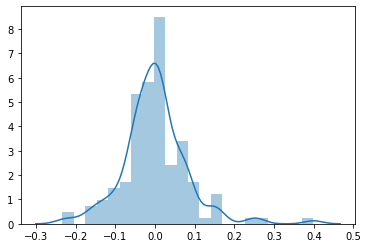

In [1334]:
#histogram for residuals(error terms)

res = y_train - yr_train_pred
sns.distplot(res)
plt.show()

#### Part-7 :  Predictions and Evaluation on the Test Set

In [1335]:
# create list of numeric vars
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio','compressionratio', 'horsepower','price']


# Apply scalar() with only transform to test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1336]:
# we can check that all variables are properly scaled 
df_test.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,compressionratio,price,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,0.887097,0.822581,0.437764,0.559481,0.480376,0.428470,0.265673,0.556580,0.248858,0.209375,0.239439,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,0.319058,0.385142,0.212861,0.189947,0.165440,0.179488,0.162820,0.228484,0.163376,0.273690,0.233076,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.128394,0.067925,-0.111111,0.016667,0.000000,0.007763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.000000,1.000000,0.313793,0.459350,0.358333,0.305275,0.177358,0.404762,0.107292,0.093750,0.092342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,1.000000,1.000000,0.387931,0.547967,0.441667,0.406129,0.226415,0.563492,0.218750,0.125000,0.158991,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,1.000000,1.000000,0.570690,0.719919,0.516667,0.564876,0.316038,0.746032,0.295833,0.150000,0.317243,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,1.000000,1.112855,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0


#### Dividing into X_test and y_test

In [1337]:
#X_test, y_test
y_test = df_test.pop('price')
X_test = df_test

In [1338]:
# add a constant since statsmodel.api dosent include a intercept and start the model line from origin
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,compressionratio,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,1.0,1,1,0.313793,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.12500,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
186,1.0,1,1,0.368966,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.12500,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
59,1.0,1,1,0.420690,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.10000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
165,1.0,1,1,0.272414,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.15000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
140,1.0,1,1,0.231034,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.10625,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [1339]:
#Creating X_test_sm dataframe by dropping variables from X_test_sm

X_test_sm = X_test_sm[['const','wheelbase','enginesize', 'horsepower',
       'compressionratio', 'four', 'six', 'twelve']]

In [1340]:
X_test_sm.head()

,const,wheelbase,enginesize,horsepower,compressionratio,four,six,twelve
160,1.0,0.313793,0.139623,0.091667,0.12500,1,0,0
186,1.0,0.368966,0.181132,0.154167,0.12500,1,0,0
59,1.0,0.420690,0.230189,0.150000,0.10000,1,0,0
165,1.0,0.272414,0.139623,0.266667,0.15000,1,0,0
140,1.0,0.231034,0.177358,0.104167,0.10625,1,0,0


In [1341]:
X_test_sm.shape

(62, 8)

In [1342]:
#predictions on the test set
y_test_pred = lm_model.predict(X_test_sm)

In [1343]:
y_test_pred.head()

160    0.058054
186    0.120336
59     0.159365
165    0.123141
140    0.076894
dtype: float64

#### Part-8 Model Evaluation

Text(0, 0.5, 'y_test_pred')

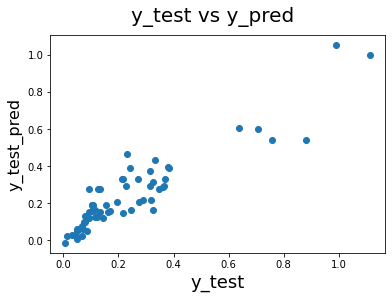

In [1344]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [1345]:
#model evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8431180534065839

We can see that the equation of our best fitted line is:

**$ price = -0.0134 + 0.1422  \times  wheelbase + 0.3951 \times horsepower + 0.7167 \times enginesize + 0.0734 \times compressionratio - 0.1186 \times cylindernumber\_four - 0.0941 \times cylindernumber\_six - 0.2985 \times cylindernumber\_twelve$**

#### Overall we have a decent model with R2 value of 84%

So basically these following factors play a key role:
    - wheelbase
    - horsepower
    - enginesize
    - compressionratio
    - cylindernumber_four
    - cylindernumber_six
    - cylindernumber_twelve